In [1]:
!pip install stable-baselines[mpi]
!pip install gym
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install tensorflow-gpu==1.15  

In [1]:
import gym
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import pathlib
pathlib.Path().absolute()

PosixPath('/content')

In [5]:
from stable_baselines.gail import DataLoader
from stable_baselines.gail import ExpertDataset

# Read Exper data
df = pd.read_table(
    'mountain_car_demo.txt',
    sep=' ',
    header=0,
    names=['pos', 'vel', 'action', 'reward'],
    skiprows=1,
    index_col=False
)

# Format expert data in usable way
# expert = DataLoader(
#     df.reset_index().index.to_numpy(),
#     df.drop(['action', 'reward'], axis=1).to_numpy(),
#     df.action.to_numpy(),
#     100
# )

# New Section

In [12]:
from stable_baselines.deepq import DQN
from stable_baselines.deepq import MlpPolicy
# Make openai-gym enviroment
env = gym.make('MountainCar-v0')

# DQN model
model = DQN(MlpPolicy, env, verbose=1, learning_rate=0.001)



In [44]:
model.learn(total_timesteps=2000000)

--------------------------------------
| % time spent exploring  | 90       |
| episodes                | 100      |
| mean 100 episode reward | -200     |
| steps                   | 19800    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 80       |
| episodes                | 200      |
| mean 100 episode reward | -200     |
| steps                   | 39800    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 70       |
| episodes                | 300      |
| mean 100 episode reward | -200     |
| steps                   | 59800    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 60       |
| episodes                | 400      |
| mean 100 episode reward | -200     |
| steps                   | 79800    |
--------------------------------------
--------------------------------------
| % time spent exploring 

In [45]:
import numpy as np
trajectories = np.empty((6,), dtype=object)
trajectories.shape
for i in range(6):
    trajectory = []
    obs = env.reset()
    done = False  
    while not done:
        action, _states = model.predict(obs)
        trajectory.append([ob for ob in obs] + [action])
        obs, reward, done, info = env.step(action)
    
    trajectories[i] = np.array(trajectory)


In [46]:
data = pd.DataFrame(np.vstack([traj for traj in trajectories]), columns=['position', 'velocity', 'action'])

In [47]:
data

,position,velocity,action
0,-0.564707,0.000000,2.0
1,-0.563399,0.001308,2.0
2,-0.560794,0.002605,2.0
3,-0.556910,0.003884,2.0
4,-0.551777,0.005133,2.0
...,...,...,...
935,0.394069,0.023659,2.0
936,0.417781,0.023712,2.0
937,0.441712,0.023931,2.0
938,0.466035,0.024323,2.0


In [48]:
colors = np.array(['red', 'green', 'blue'])

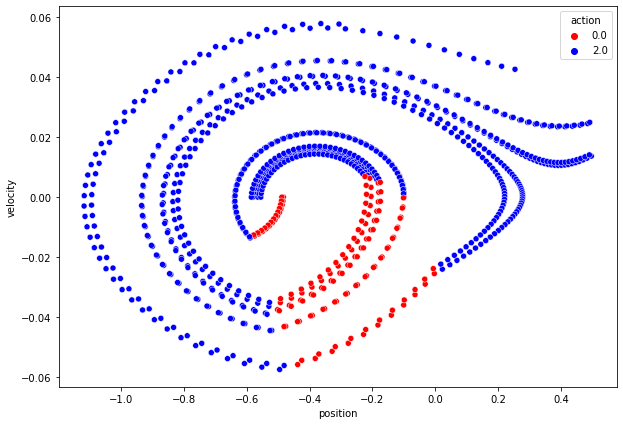

In [49]:


fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.scatterplot(
    x=data.position,
    y=data.velocity,
    hue=data.action,
    palette=colors[np.unique(data.action.to_numpy()).astype(int)].tolist()
    )

In [ ]:
model.learn

<bound method DQN.learn of <stable_baselines.deepq.dqn.DQN object at 0x7f9210acc050>>